In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ex2data2.txt', sep=',', names=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
X = df.drop(columns=['y'])
y = df['y']

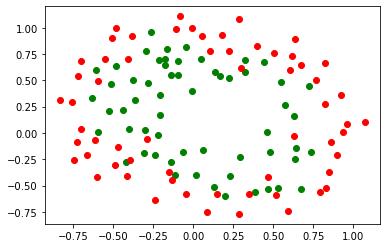

In [4]:
plt.scatter(df.loc[df['y'] == 1, 'x1'], df.loc[df['y'] == 1, 'x2'], c='g')
plt.scatter(df.loc[df['y'] == 0, 'x1'], df.loc[df['y'] == 0, 'x2'], c='r')

In [5]:
# let's generate additional features by maping the features into
# all polynomial terms of x1 and x2 up to the sixth power.
def generate_polinomial(x1, x2, power=6):
    result = []
    for i in range(1, power + 1):
        for j in range(0, i + 1):
            result.append(np.power(x1, i - j) * np.power(x2, j))

    return result

new_X = []
for idx, row in X.iterrows():
    new_X.append(generate_polinomial(row[0], row[1], power=6))

new_X = pd.DataFrame(new_X, columns=['x' + str(i) for i in range(1, len(new_X[0]) + 1)])
new_X['x0'] = np.ones(new_X.shape[0])
new_X = new_X[['x0', *new_X.columns[:-1]]]
new_X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [6]:
def sigmoid(z):
    return (1 / (1 + np.power(np.e, -z)))

In [7]:
def h_of_theta(theta, x):
    return sigmoid(np.dot(theta.T, x))

In [8]:
def J_of_theta(theta, x_i, y_i):
    return (-y_i * np.log(h_of_theta(theta, x_i))) - ((1 - y_i) * np.log(1 - h_of_theta(theta, x_i)))

In [9]:
def cost_function_with_regularization(theta, X, y, lmbda=1.):
    J_of_thetas = []
    regularized_suffix = np.sum(np.power(theta[1:], 2)) * (lmbda / (2 * X.shape[0]))
    for (idx, x_i), y_i in zip(X.iterrows(), y):
        J_of_thetas.append(J_of_theta(theta, x_i, y_i))
    return (1 / X.shape[0]) * np.sum(J_of_thetas) + regularized_suffix

In [10]:
def gradient(theta, X, y, j):
    result = []
    for idx, x_i in X.iterrows():
        result.append((h_of_theta(theta, x_i) - y[idx]) * x_i[j])
    return (1. / X.shape[0]) * np.sum(result)

In [11]:
thetas = np.zeros(new_X.shape[1])
thetas

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# Once you are done, ex2 reg.m will call your costFunctionReg function
# using the initial value of θ (initialized to all zeros). You should see that the
# cost is about 0.693.
cost_function_with_regularization(thetas, new_X, y)

0.6931471805599454

In [13]:
result = minimize(cost_function_with_regularization, thetas, args=(new_X, y, 1.))
new_thetas = result.x
new_thetas

array([ 1.27268741,  0.62557005,  1.18096632, -2.01919833, -0.91761445,
       -1.43194193,  0.12375917, -0.36513079, -0.35703367, -0.17485781,
       -1.45843772, -0.05129646, -0.6160393 , -0.27464097, -1.19282571,
       -0.24270319, -0.20570013, -0.04499756, -0.27782687, -0.29525804,
       -0.4561331 , -1.04377851,  0.02762836, -0.29265634,  0.01543447,
       -0.32759298, -0.14389195, -0.92460086])

In [14]:
gradients = []
for j, theta_j in enumerate(new_thetas):
    gradients.append(gradient(new_thetas, new_X, y, j))
gradients[:5]

[-7.299026326312288e-07,
 -0.005297901751389497,
 -0.010008566077701665,
 0.017120084879267385,
 0.007774061908365425]

In [15]:
import itertools

decision_boundary_parameters_x1 = np.arange(-1, 1.2, step=0.01)
decision_boundary_parameters_x2 = np.arange(-1, 1.3, step=0.01)
decision_boundary_parameters_x2.shape

(230,)

In [16]:
test_X = []
for x1, x2 in itertools.product(decision_boundary_parameters_x1, decision_boundary_parameters_x2):
    test_X.append(generate_polinomial(x1, x2, power=6))

test_X = pd.DataFrame(test_X, columns=['x' + str(i) for i in range(1, len(test_X[0]) + 1)])
test_X['x0'] = np.ones(test_X.shape[0])
test_X = test_X[['x0', *test_X.columns[:-1]]]
test_X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,1.0,-1.0,-1.00,1.0,1.00,1.0000,-1.0,-1.00,-1.0000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.0,1.00,1.0000,1.000000,1.000000,1.000000,1.000000
1,1.0,-1.0,-0.99,1.0,0.99,0.9801,-1.0,-0.99,-0.9801,-0.970299,...,-0.970299,-0.960596,-0.950990,1.0,0.99,0.9801,0.970299,0.960596,0.950990,0.941480
2,1.0,-1.0,-0.98,1.0,0.98,0.9604,-1.0,-0.98,-0.9604,-0.941192,...,-0.941192,-0.922368,-0.903921,1.0,0.98,0.9604,0.941192,0.922368,0.903921,0.885842
3,1.0,-1.0,-0.97,1.0,0.97,0.9409,-1.0,-0.97,-0.9409,-0.912673,...,-0.912673,-0.885293,-0.858734,1.0,0.97,0.9409,0.912673,0.885293,0.858734,0.832972
4,1.0,-1.0,-0.96,1.0,0.96,0.9216,-1.0,-0.96,-0.9216,-0.884736,...,-0.884736,-0.849347,-0.815373,1.0,0.96,0.9216,0.884736,0.849347,0.815373,0.782758


In [17]:
result = []
for idx, row in test_X.iterrows():
    result.append((idx, h_of_theta(new_thetas, row)))

In [18]:
result = pd.DataFrame(result, columns=['row', 'proba'])
result.head()

,row,proba
0,0,0.000138
1,1,0.000158
2,2,0.000180
3,3,0.000205
4,4,0.000232


In [19]:
# eps = 0.01
des_bound = result.loc[np.abs(result['proba'] - 0.5) < 0.01, :]

In [20]:
des_bound = result.loc[np.abs(result['proba'] - 0.5) < 0.01, :]
des_bound = test_X.iloc[des_bound.index]
edge_x1 = des_bound['x1']
edge_x2 = des_bound['x2']

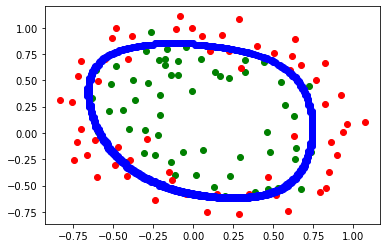

In [21]:
plt.scatter(df.loc[df['y'] == 1, 'x1'], df.loc[df['y'] == 1, 'x2'], c='g')
plt.scatter(df.loc[df['y'] == 0, 'x1'], df.loc[df['y'] == 0, 'x2'], c='r')
plt.scatter(edge_x1, edge_x2, c='b')